In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set()

In [3]:
deliveries = pd.read_json("../data_new/deliveries.jsonl", lines=True)
products = pd.read_json("../data_new/products.jsonl", lines=True)
sessions = pd.read_json("../data_new/sessions.jsonl", lines=True)
users = pd.read_json("../data_new/users.jsonl", lines=True)

# Tabela `deliveries`

In [4]:
deliveries["purchase_timestamp"] = pd.to_datetime(deliveries["purchase_timestamp"])
deliveries["delivery_timestamp"] = pd.to_datetime(deliveries["delivery_timestamp"])

In [5]:
deliveries

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-04-01 15:52:47,2021-04-02 14:06:34.432964,620
1,20002,2021-04-01 02:26:23,2021-04-02 10:45:27.707128,360
2,20003,2021-01-03 05:11:17,2021-01-04 15:43:07.635371,620
3,20004,2021-02-17 12:59:54,2021-02-18 11:52:42.608746,620
4,20005,2021-02-13 09:17:52,2021-02-15 08:59:28.973167,620
...,...,...,...,...
7488,27489,2021-03-07 08:53:25,2021-03-09 08:57:42.852988,620
7489,27490,2021-02-02 03:47:59,2021-02-02 16:10:25.579518,516
7490,27491,2021-03-04 07:34:59,2021-03-05 11:45:45.828316,360
7491,27492,2021-01-12 05:34:58,2021-01-13 08:07:37.900596,516


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   purchase_id         7493 non-null   int64         
 1   purchase_timestamp  7493 non-null   datetime64[ns]
 2   delivery_timestamp  7493 non-null   datetime64[ns]
 3   delivery_company    7493 non-null   int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 234.3 KB


## purchase_timestamp, delivery_timestamp

In [7]:
deliveries["purchase_timestamp"].min()

Timestamp('2021-01-01 00:12:54')

In [8]:
deliveries["purchase_timestamp"].max()

Timestamp('2021-04-25 15:55:45')

<AxesSubplot:>

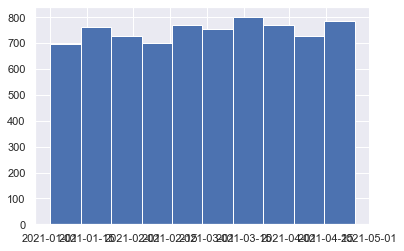

In [9]:
deliveries["purchase_timestamp"].hist()

Kolumna `purchase_timestamp` ma zakres wartości od `2021-01-01` do `2021-03-15` o rozkładzie jednostajnym.

In [10]:
deliveries["delivery_timestamp"].min()

Timestamp('2021-01-01 12:19:27.708941')

In [11]:
deliveries["delivery_timestamp"].max()

Timestamp('2021-04-28 15:55:02.216864')

<AxesSubplot:>

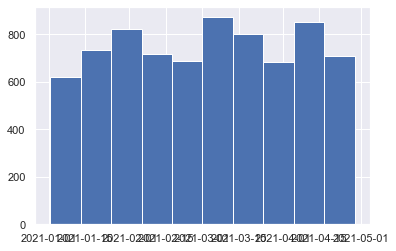

In [12]:
deliveries["delivery_timestamp"].hist()

In [13]:
deliveries[deliveries["purchase_timestamp"] > deliveries["delivery_timestamp"]]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company


In [14]:
deliveries["hours"] = (deliveries["delivery_timestamp"] - deliveries["purchase_timestamp"]).dt.total_seconds() / 3600

In [15]:
deliveries["hours"].min()

1.4597918413888888

In [16]:
deliveries["hours"].max()

117.83370102666667

In [17]:
deliveries["hours"].mean()

44.43016316143371

In [18]:
deliveries["hours"].std()

19.588698800097372

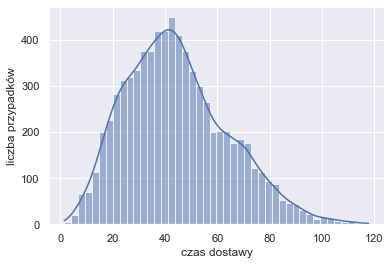

In [19]:
ax = sns.histplot(deliveries["hours"], kde=True)
ax.set(xlabel="czas dostawy", ylabel="liczba przypadków")
plt.show()

**Hipoteza zerowa**: niepuste wartości kolumny `hours` należą do rozkładu normalnego.

Przeprowadzamy test Shapiro-Wilka na losowych próbach danych.

In [20]:
temp = deliveries[~deliveries["hours"].isna()]["hours"]

In [21]:
stats.shapiro(temp.sample(10))

ShapiroResult(statistic=0.880234956741333, pvalue=0.1313069760799408)

In [22]:
stats.shapiro(temp.sample(100))

ShapiroResult(statistic=0.9741048216819763, pvalue=0.045927803963422775)

In [23]:
stats.shapiro(temp.sample(1000))

ShapiroResult(statistic=0.9733849763870239, pvalue=1.42606466999734e-12)

In [24]:
stats.shapiro(temp.sample(5000))

ShapiroResult(statistic=0.9777978658676147, pvalue=2.9669127978840252e-27)

In [25]:
stats.shapiro(temp)

c:\users\adrian\miniconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9792067408561707, pvalue=1.0749388024710264e-31)

Otrzymujemy p-wartości większe niż $0.05$, zatem nie udało się odrzucić hipotezy zerowej, tzn. dane mogą mieć rozkład normalny.

## delivery_company

In [26]:
sorted(deliveries["delivery_company"].unique())

[360, 516, 620]

Kolumna `delivery_company` tak naprawdę jest typem dyskretnym o trzech możliwych niepustych wartościach. Może zostać zakodowana metodą *one-hot*.

# Tabela `products`

In [27]:
products

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [28]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


In [29]:
categories = set()

for x in products["category_path"]:
    categories.update(x.lower().split(";"))

sorted(categories)

['akcesoria telefoniczne',
 'anteny rtv',
 'audio',
 'biurowe urządzenia wielofunkcyjne',
 'drukarki i skanery',
 'gry i konsole',
 'gry komputerowe',
 'gry na konsole',
 'gry playstation3',
 'gry xbox 360',
 'komputery',
 'monitory',
 'monitory lcd',
 'odtwarzacze dvd',
 'odtwarzacze mp3 i mp4',
 'okulary 3d',
 'przenośne audio i video',
 'sprzęt rtv',
 'słuchawki',
 'tablety',
 'tablety i akcesoria',
 'telefony i akcesoria',
 'telefony komórkowe',
 'telefony stacjonarne',
 'telewizory i akcesoria',
 'video',
 'zestawy głośnomówiące',
 'zestawy słuchawkowe']

Kolumna `price` jest ceną produktu.

In [30]:
products["price"].min()

1.0

In [31]:
products["price"].max()

7639.0

In [32]:
products["price"].mean()

247.78796238244504

In [33]:
products["price"].std()

813.7885482376182

In [34]:
products[products["price"] > 1e4]

,product_id,product_name,category_path,price


In [35]:
products[products["price"] <= 0]

,product_id,product_name,category_path,price


# Tabela `sessions`

In [36]:
sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-03-09 23:09:07,102,1283,VIEW_PRODUCT,5,NaN
1,100002,2021-04-01 15:51:06,102,1234,VIEW_PRODUCT,0,NaN
2,100002,2021-04-01 15:52:47,102,1234,BUY_PRODUCT,0,20001.0
3,100003,2021-04-01 02:14:04,102,1284,VIEW_PRODUCT,15,NaN
4,100003,2021-04-01 02:16:37,102,1292,VIEW_PRODUCT,15,NaN
...,...,...,...,...,...,...,...
40892,110623,2021-04-04 11:10:48,301,1317,VIEW_PRODUCT,0,NaN
40893,110624,2021-02-03 15:17:49,301,1233,VIEW_PRODUCT,0,NaN
40894,110624,2021-02-03 15:19:18,301,1234,VIEW_PRODUCT,0,NaN
40895,110624,2021-02-03 15:23:11,301,1234,BUY_PRODUCT,0,27493.0


In [37]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40897 entries, 0 to 40896
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        40897 non-null  int64         
 1   timestamp         40897 non-null  datetime64[ns]
 2   user_id           40897 non-null  int64         
 3   product_id        40897 non-null  int64         
 4   event_type        40897 non-null  object        
 5   offered_discount  40897 non-null  int64         
 6   purchase_id       7493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.2+ MB


In [38]:
sessions["event_type"].unique()

array(['VIEW_PRODUCT', 'BUY_PRODUCT'], dtype=object)

<AxesSubplot:>

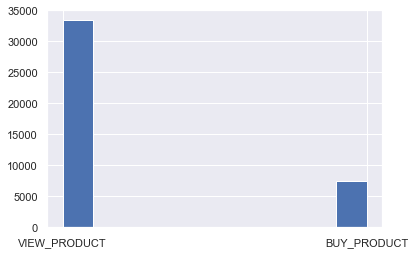

In [39]:
sessions["event_type"].hist()

In [40]:
sessions["timestamp"].min()

Timestamp('2021-01-01 00:11:06')

In [41]:
sessions["timestamp"].max()

Timestamp('2021-04-25 15:55:45')

<AxesSubplot:>

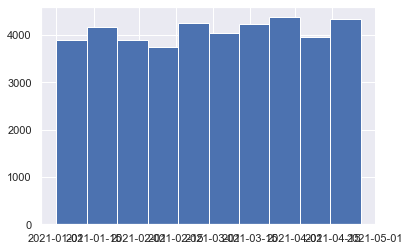

In [42]:
sessions["timestamp"].hist()

Kolumna `timestamp` ma zakres wartości od `2021-01-01` do `2021-03-15` o przybliżonym rozkładzie jednostajnym.

<AxesSubplot:>

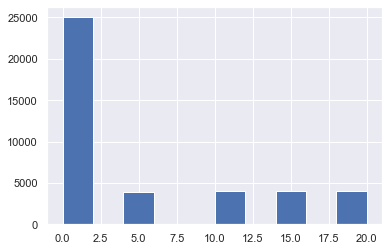

In [43]:
sessions["offered_discount"].hist()

In [44]:
sorted(sessions["offered_discount"].unique())

[0, 5, 10, 15, 20]

In [45]:
sessions.groupby("event_type").agg({"offered_discount": set})

,offered_discount
event_type,
BUY_PRODUCT,"{0, 5, 10, 15, 20}"
VIEW_PRODUCT,"{0, 5, 10, 15, 20}"


<AxesSubplot:>

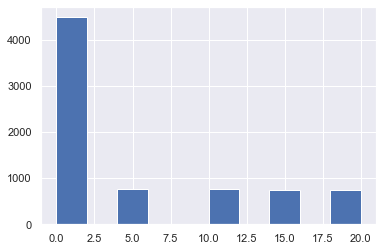

In [46]:
sessions[sessions["event_type"] == "BUY_PRODUCT"]["offered_discount"].hist()

<AxesSubplot:>

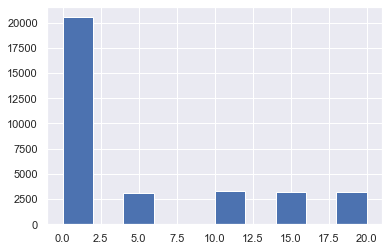

In [47]:
sessions[sessions["event_type"] == "VIEW_PRODUCT"]["offered_discount"].hist()

# Tabela `users`

In [48]:
users

,user_id,name,city,street
0,102,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53
1,103,Mateusz Kobel,Police,al. Wrocławska 10
2,104,Radosław Ratka,Mielec,pl. Nowa 89/04
3,105,Anastazja Oszust,Szczecin,ul. Częstochowska 80
4,106,Sylwia Nurek,Szczecin,al. Wiosenna 72
...,...,...,...,...
195,297,Andrzej Kreczmer,Szczecin,ul. Zdrojowa 43/11
196,298,Natan Świadek,Mielec,pl. Staffa 801
197,299,Jeremi Kajstura,Konin,pl. Wiklinowa 022
198,300,Gustaw Cofała,Gdynia,ulica Krakowska 847


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


Kolumna `user_id` jest kluczem głównym. Kolumna `name` zawiera imię, druge imię, nazwisko. Kolumna `city` jest miastem. Kolumna `street` jest ulicą oraz numerem domu.

In [50]:
users["name"].apply(lambda x: len(x.split(" "))).unique()

array([2, 3], dtype=int64)

In [51]:
sorted(users["city"].unique())

['Gdynia',
 'Konin',
 'Kutno',
 'Mielec',
 'Police',
 'Radom',
 'Szczecin',
 'Warszawa']

In [52]:
sorted(users["street"].apply(lambda x: len(x.split(" "))).unique())

[3, 4, 5]

In [53]:
sorted(users["street"].apply(lambda x: x.split(" ")[0]).unique())

['al.', 'aleja', 'pl.', 'plac', 'ul.', 'ulica']

# Złączenie tabel

In [54]:
data = sessions.merge(users, on="user_id", how="outer").merge(products, on="product_id", how="outer").merge(deliveries, on="purchase_id", how="outer")
data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,name,city,street,product_name,category_path,price,purchase_timestamp,delivery_timestamp,delivery_company,hours
0,100001.0,2021-03-09 23:09:07,102.0,1283,VIEW_PRODUCT,5.0,NaN,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,Okulary 3D PHILIPS PTA436/00,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,NaT,NaT,NaN,NaN
1,100011.0,2021-01-02 11:44:46,102.0,1283,VIEW_PRODUCT,0.0,NaN,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,Okulary 3D PHILIPS PTA436/00,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,NaT,NaT,NaN,NaN
2,100022.0,2021-04-03 21:41:40,102.0,1283,VIEW_PRODUCT,0.0,NaN,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,Okulary 3D PHILIPS PTA436/00,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,NaT,NaT,NaN,NaN
3,100048.0,2021-04-24 15:17:16,102.0,1283,VIEW_PRODUCT,0.0,NaN,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,Okulary 3D PHILIPS PTA436/00,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,NaT,NaT,NaN,NaN
4,100074.0,2021-04-08 12:03:00,102.0,1283,VIEW_PRODUCT,20.0,NaN,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,Okulary 3D PHILIPS PTA436/00,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41133,110358.0,2021-04-19 22:09:12,298.0,1201,BUY_PRODUCT,0.0,27295.0,Natan Świadek,Mielec,pl. Staffa 801,Jabra Speak 410,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-04-19 22:09:12,2021-04-22 11:08:48.449133,516.0,60.993458
41134,110400.0,2021-04-01 01:04:59,299.0,1201,BUY_PRODUCT,0.0,27326.0,Jeremi Kajstura,Konin,pl. Wiklinowa 022,Jabra Speak 410,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-04-01 01:04:59,2021-04-02 16:57:34.644147,360.0,39.876568
41135,110418.0,2021-03-19 14:30:38,299.0,1201,BUY_PRODUCT,5.0,27338.0,Jeremi Kajstura,Konin,pl. Wiklinowa 022,Jabra Speak 410,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-03-19 14:30:38,2021-03-22 08:23:55.491050,360.0,65.888192
41136,110424.0,2021-02-26 10:45:36,299.0,1201,BUY_PRODUCT,0.0,27343.0,Jeremi Kajstura,Konin,pl. Wiklinowa 022,Jabra Speak 410,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-02-26 10:45:36,2021-03-01 08:16:23.091200,620.0,69.513081


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41138 entries, 0 to 41137
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   session_id          40897 non-null  float64       
 1   timestamp           40897 non-null  datetime64[ns]
 2   user_id             40897 non-null  float64       
 3   product_id          41138 non-null  int64         
 4   event_type          40897 non-null  object        
 5   offered_discount    40897 non-null  float64       
 6   purchase_id         7493 non-null   float64       
 7   name                40897 non-null  object        
 8   city                40897 non-null  object        
 9   street              40897 non-null  object        
 10  product_name        41138 non-null  object        
 11  category_path       41138 non-null  object        
 12  price               41138 non-null  float64       
 13  purchase_timestamp  7493 non-null   datetime64

In [56]:
data.loc[(data["event_type"] == "BUY_PRODUCT") & ((data["price"] <= 0) | (data["price"] > 1e4) | (data["hours"] <= 0))]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,name,city,street,product_name,category_path,price,purchase_timestamp,delivery_timestamp,delivery_company,hours


# Selekcja atrybutów

In [57]:
data = data.loc[(data["event_type"] == "BUY_PRODUCT") & (data["price"] > 0) & (data["hours"] > 0) & (~data["user_id"].isnull()) & (~data["delivery_company"].isnull())].reset_index(drop=True)

In [58]:
data["purchase_hour"] = data["purchase_timestamp"].dt.hour
data["delivery_hour"] = data["delivery_timestamp"].dt.hour
data["purchase_dayofweek"] = data["purchase_timestamp"].dt.dayofweek
data["delivery_dayofweek"] = data["delivery_timestamp"].dt.dayofweek

In [59]:
data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,name,city,street,...,category_path,price,purchase_timestamp,delivery_timestamp,delivery_company,hours,purchase_hour,delivery_hour,purchase_dayofweek,delivery_dayofweek
0,100011.0,2021-01-02 11:46:41,102.0,1283,BUY_PRODUCT,0.0,20010.0,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,...,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,2021-01-02 11:46:41,2021-01-04 14:47:00.609117,360.0,51.005447,11,14,5,0
1,100022.0,2021-04-03 21:41:48,102.0,1283,BUY_PRODUCT,0.0,20018.0,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,...,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,2021-04-03 21:41:48,2021-04-05 15:49:41.990022,360.0,42.131664,21,15,5,0
2,100074.0,2021-04-08 12:05:00,102.0,1283,BUY_PRODUCT,20.0,20049.0,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,...,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,2021-04-08 12:05:00,2021-04-09 17:11:46.026638,516.0,29.112785,12,17,3,4
3,100091.0,2021-04-24 22:47:05,102.0,1283,BUY_PRODUCT,0.0,20064.0,Aurelia Malon,Police,pl. Brzoskwiniowa 11/53,...,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,2021-04-24 22:47:05,2021-04-26 17:33:45.830653,620.0,42.778009,22,17,5,0
4,100118.0,2021-03-18 07:15:15,104.0,1283,BUY_PRODUCT,5.0,20084.0,Radosław Ratka,Mielec,pl. Nowa 89/04,...,Sprzęt RTV;Video;Telewizory i akcesoria;Okular...,99.99,2021-03-18 07:15:15,2021-03-22 10:01:10.213580,620.0,98.765337,7,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,110358.0,2021-04-19 22:09:12,298.0,1201,BUY_PRODUCT,0.0,27295.0,Natan Świadek,Mielec,pl. Staffa 801,...,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-04-19 22:09:12,2021-04-22 11:08:48.449133,516.0,60.993458,22,11,0,3
7489,110400.0,2021-04-01 01:04:59,299.0,1201,BUY_PRODUCT,0.0,27326.0,Jeremi Kajstura,Konin,pl. Wiklinowa 022,...,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-04-01 01:04:59,2021-04-02 16:57:34.644147,360.0,39.876568,1,16,3,4
7490,110418.0,2021-03-19 14:30:38,299.0,1201,BUY_PRODUCT,5.0,27338.0,Jeremi Kajstura,Konin,pl. Wiklinowa 022,...,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-03-19 14:30:38,2021-03-22 08:23:55.491050,360.0,65.888192,14,8,4,0
7491,110424.0,2021-02-26 10:45:36,299.0,1201,BUY_PRODUCT,0.0,27343.0,Jeremi Kajstura,Konin,pl. Wiklinowa 022,...,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,327.47,2021-02-26 10:45:36,2021-03-01 08:16:23.091200,620.0,69.513081,10,8,4,0


Niektóre dni zakupu/dostawy częściej występują niż inne.

In [60]:
data.groupby("purchase_dayofweek").agg({"delivery_dayofweek": sum})

,delivery_dayofweek
purchase_dayofweek,
0,1807
1,2738
2,3704
3,4163
4,2388
5,385
6,868


In [61]:
data.groupby("delivery_dayofweek").agg({"delivery_dayofweek": sum})

,delivery_dayofweek
delivery_dayofweek,
0,0
1,1033
2,2058
3,2991
4,4316
5,5655


In [62]:
data.groupby("purchase_hour").agg({"purchase_hour": sum})

,purchase_hour
purchase_hour,
0,0
1,308
2,654
3,840
4,1148
5,1540
6,1944
7,2177
8,2640


In [63]:
data.groupby("delivery_hour").agg({"delivery_hour": sum})

,delivery_hour
delivery_hour,
8,35224
9,2565
10,3190
11,3465
12,3756
13,3601
14,4060
15,4875
16,4704


Lokalizacja może mieć silny wpływ na czas dostawy.

In [64]:
data.groupby("city")["hours"].mean()

city
Gdynia      49.105108
Konin       56.206428
Kutno       43.927362
Mielec      77.173695
Police      35.518835
Radom       41.424453
Szczecin    25.786933
Warszawa    37.351942
Name: hours, dtype: float64

Firma kurierska może nie mieć silnego wpływu na czas dostawy.

In [65]:
data.groupby("delivery_company")["hours"].mean()

delivery_company
360.0    47.925708
516.0    41.291805
620.0    44.193564
Name: hours, dtype: float64

In [66]:
data["product_name_length"] = data["product_name"].apply(lambda x: len(x))
data["category_path_length"] = data["category_path"].apply(lambda x: len(x))

<AxesSubplot:>

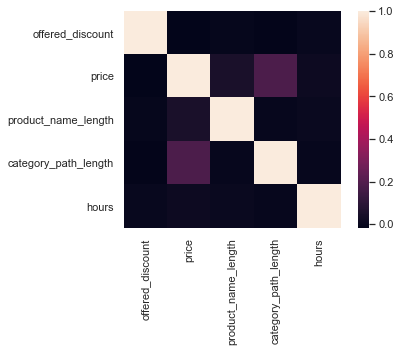

In [67]:
sns.heatmap(data[["offered_discount", "price", "product_name_length", "category_path_length", "hours"]].corr(), square=True)

In [68]:
data.drop(["timestamp", "user_id", "name", "event_type", "session_id", "product_id", "purchase_id", "product_name", "category_path", "price"], axis=1, inplace=True)
data

,offered_discount,city,street,purchase_timestamp,delivery_timestamp,delivery_company,hours,purchase_hour,delivery_hour,purchase_dayofweek,delivery_dayofweek,product_name_length,category_path_length
0,0.0,Police,pl. Brzoskwiniowa 11/53,2021-01-02 11:46:41,2021-01-04 14:47:00.609117,360.0,51.005447,11,14,5,0,28,50
1,0.0,Police,pl. Brzoskwiniowa 11/53,2021-04-03 21:41:48,2021-04-05 15:49:41.990022,360.0,42.131664,21,15,5,0,28,50
2,20.0,Police,pl. Brzoskwiniowa 11/53,2021-04-08 12:05:00,2021-04-09 17:11:46.026638,516.0,29.112785,12,17,3,4,28,50
3,0.0,Police,pl. Brzoskwiniowa 11/53,2021-04-24 22:47:05,2021-04-26 17:33:45.830653,620.0,42.778009,22,17,5,0,28,50
4,5.0,Mielec,pl. Nowa 89/04,2021-03-18 07:15:15,2021-03-22 10:01:10.213580,620.0,98.765337,7,10,3,0,28,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,0.0,Mielec,pl. Staffa 801,2021-04-19 22:09:12,2021-04-22 11:08:48.449133,516.0,60.993458,22,11,0,3,15,65
7489,0.0,Konin,pl. Wiklinowa 022,2021-04-01 01:04:59,2021-04-02 16:57:34.644147,360.0,39.876568,1,16,3,4,15,65
7490,5.0,Konin,pl. Wiklinowa 022,2021-03-19 14:30:38,2021-03-22 08:23:55.491050,360.0,65.888192,14,8,4,0,15,65
7491,0.0,Konin,pl. Wiklinowa 022,2021-02-26 10:45:36,2021-03-01 08:16:23.091200,620.0,69.513081,10,8,4,0,15,65
